<h2> <b> Predicting Life Expectancy using Single Predictor and Multiple Predictors Linear Regression Models</h2>
    
section: 004 <br>
student ID: 10047158, student name: Jack Hwang <br>
student ID: 46198719, student name: May Zang <br>
student ID: 69175503, student name: Fei Long 

<h3> Introduction:

Life expectancy varies greatly by country, impacted by demographic, socioeconomic, and health factors. Analyzing the data on life expectancy and relevant factors has significant implications for health outcomes, programs, and policies. Using a data set from the World Health Organization that contains life expectancy and relevant factors of 192 countries from 2000 to 2015, we aim to investigate the causal relationship between the top 6 most correlated features: schooling, income, BMI, alcohol consumption, GDP, national healthcare expenditure, and life expectancy. We plan to use a single-parameter linear regression model for schooling, a single-parameter linear regression model for income, a multi-parameter linear regression model for both schooling and income, and finally a multi-parameter linear regression model for the top 6 most correlated features to life expectancy to predict life expectancy for people using the data from 2000 to 2015. The chosen predictors are directly relevant to life expectancy, and our research aims to use relevant data to predict life expectancy accurately.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import plotly.express as px
import sklearn.metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [51]:
# Load dataset
df = pd.read_csv('data.csv', delimiter=',')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

As we can see that there are some missing values in some columns and some of the column names contain blank space, we would need to clean up the data before we can perform any regressional analysis. <br>

First, let's rename the column names such that the column names are without blank space.

In [53]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

Secondly, let's examine the number of missing values in each column.

In [54]:
df.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under-five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness__1-19_years                34
thinness_5-9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

There are many methods to deal with missing values. Here we have decided to drop them.

In [55]:
df.dropna(inplace = True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          1649 non-null   object 
 1   year                             1649 non-null   int64  
 2   status                           1649 non-null   object 
 3   life_expectancy                  1649 non-null   float64
 4   adult_mortality                  1649 non-null   float64
 5   infant_deaths                    1649 non-null   int64  
 6   alcohol                          1649 non-null   float64
 7   percentage_expenditure           1649 non-null   float64
 8   hepatitis_b                      1649 non-null   float64
 9   measles                          1649 non-null   int64  
 10  bmi                              1649 non-null   float64
 11  under-five_deaths                1649 non-null   int64  
 12  polio               

Now that the data is properly cleaned, we can start performing our regressional analysis.

## Training, testing dataset split

First, let's create the training dataset and the testing dataset.

In [57]:
# 25% for testing and 75% for training .
y = df['life_expectancy']
X = df.drop('life_expectancy', axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [58]:
data = X_train.copy()
data['life_expectancy'] = y_train
data

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,life_expectancy
1393,Kiribati,2000,Developing,222.0,0,0.46,11.075433,9.0,0,67.9,...,8.12,9.0,0.1,796.793763,8446.0,0.2,0.2,0.000,10.0,64.1
1609,Maldives,2008,Developing,81.0,0,1.76,1077.712092,98.0,0,2.3,...,9.30,98.0,0.1,5828.621374,362.0,14.2,14.3,0.641,11.8,75.9
1645,Malta,2004,Developed,69.0,0,6.53,203.315750,85.0,4,64.5,...,8.46,89.0,0.1,1519.549700,41268.0,0.7,0.7,0.797,14.2,78.7
1945,Pakistan,2012,Developing,165.0,369,0.04,59.659001,72.0,8046,23.2,...,2.76,72.0,0.1,1261.289670,177911533.0,19.8,2.2,0.529,7.6,65.7
2668,Tunisia,2012,Developing,13.0,3,1.30,585.877676,97.0,48,58.3,...,7.18,97.0,0.1,4137.554210,1886668.0,6.4,6.3,0.717,14.6,74.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943,Pakistan,2014,Developing,162.0,359,0.01,62.293611,72.0,1370,24.7,...,2.61,72.0,0.1,1316.989660,185546257.0,19.4,19.8,0.542,7.8,66.2
2362,Solomon Islands,2014,Developing,183.0,0,0.01,3.718439,88.0,0,49.7,...,5.50,88.0,0.1,29.652622,57554.0,1.1,1.2,0.512,9.6,68.8
2477,Suriname,2011,Developing,187.0,0,5.64,989.126356,86.0,0,55.5,...,5.93,86.0,0.1,8318.976920,531589.0,3.5,3.4,0.704,12.5,76.0
2439,Spain,2001,Developed,84.0,2,9.86,2044.169761,83.0,0,58.2,...,7.24,96.0,0.1,15323.611400,485412.0,0.6,0.5,0.825,15.7,79.4


The table above shows all features and expectancies involved in our training model.

We can have a better visual understanding of the distribution of life expectancies in our training model by converting the table above to a histogram as below.

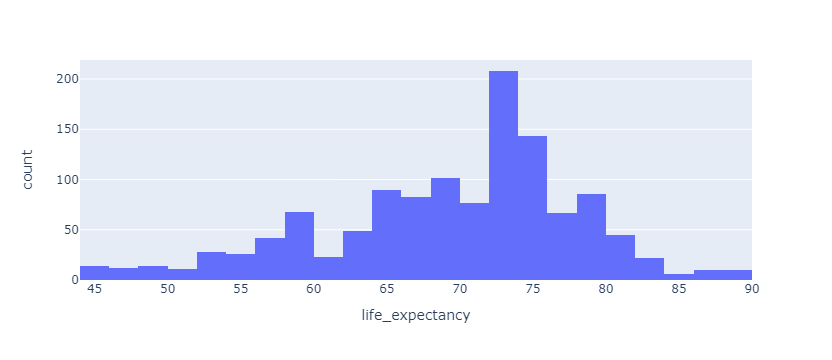

In [59]:
fig=px.histogram(data,x='life_expectancy')
fig.show()

Now that we have a clear understanding of our training dataset, we can perform a correlational analysis between any 2 features in our training dataset by using a heatmap as below.

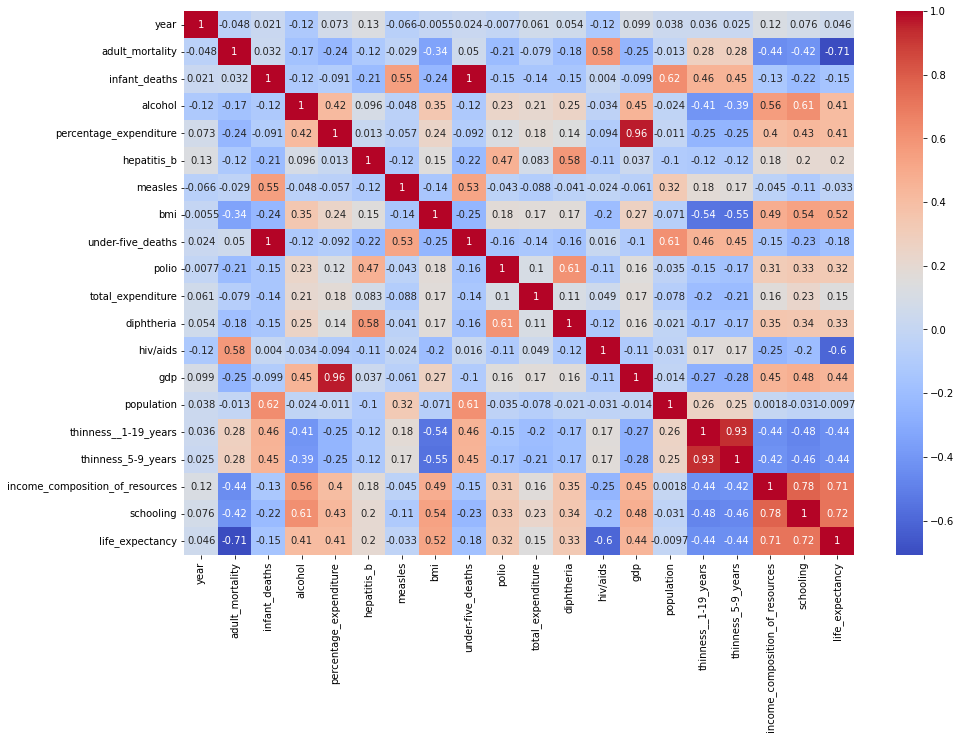

In [60]:
plt.figure(figsize=(15,10))

# calculate the correlation matrix between all pairs of columns
corr = data.corr()

# plot a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

From the above table, we extract the information at the bottom row where it shows the correlation between life expectancy and other features, then use the following code to see the features that are most correlated with life expectancy.

In [61]:
corr = data.corr()['life_expectancy']
corr_sorted = corr.sort_values(ascending=False)

corr_sorted

life_expectancy                    1.000000
schooling                          0.715350
income_composition_of_resources    0.714419
bmi                                0.524994
gdp                                0.443002
percentage_expenditure             0.411587
alcohol                            0.406773
diphtheria                         0.332510
polio                              0.320555
hepatitis_b                        0.201667
total_expenditure                  0.150844
year                               0.046491
population                        -0.009721
measles                           -0.033163
infant_deaths                     -0.153876
under-five_deaths                 -0.176210
thinness_5-9_years                -0.439728
thinness__1-19_years              -0.439731
hiv/aids                          -0.601483
adult_mortality                   -0.707268
Name: life_expectancy, dtype: float64

We are only focusing on the features with correlation value > 0.4 to life expectancy as these will be the more significant features. These features will be schooling, income, BMI, GDP,Percentage Expenditure, and Alcohol Consumption. <br>

We created the following scatter plots for each correlation so that we can see the correlation better graphically.

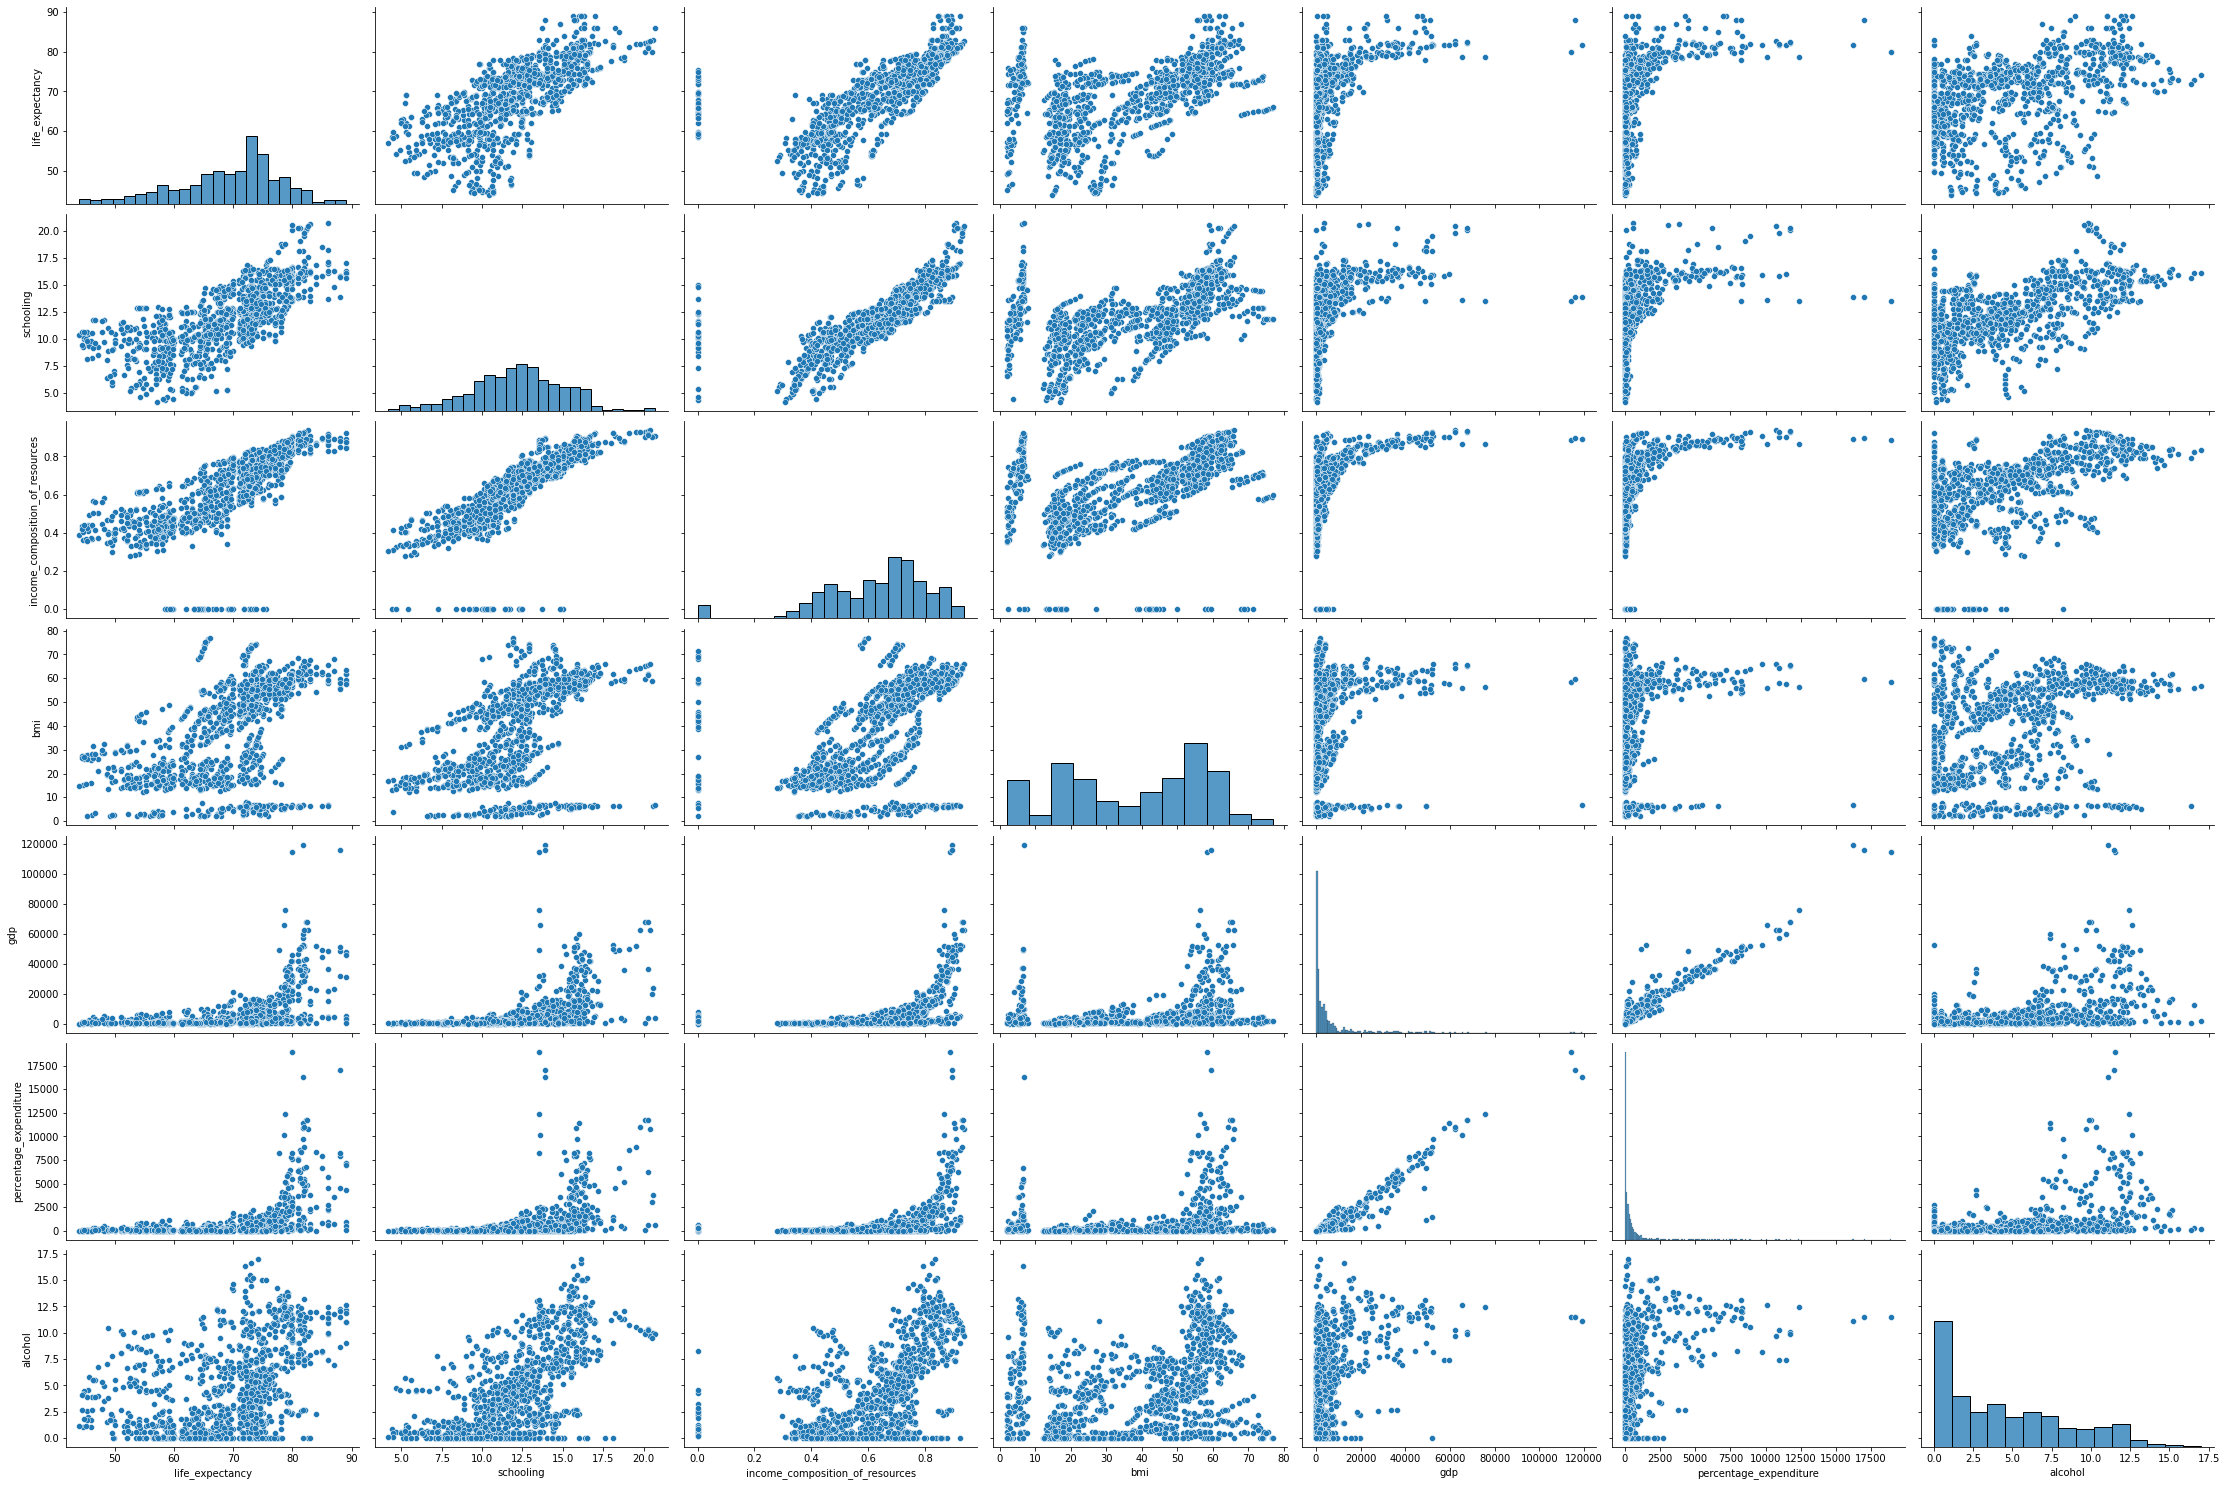

In [62]:
selected = data[['life_expectancy','schooling','income_composition_of_resources','bmi','gdp','percentage_expenditure','alcohol']]
sns.pairplot(selected, height=3, aspect=1.5)
plt.show()

As we can see from the above, life expectancy is clearly more correlated in a graphical sense to income and schooling, and therefore we have selected these two features as our predictor variables for our regressional analysis. 

## Linear Regression on Schooling


To further verify that schooling is highly correlated to life expectancy, we plot out the following in order to have a better visualization.

Text(0.5, 1.0, 'Relationship between schooling and life expectancy')

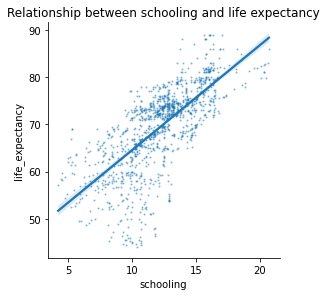

In [63]:
sns.lmplot(
    data=data, x="schooling", y="life_expectancy", height=4, 
    scatter_kws=dict(s=1.5, alpha=0.35)
);
ax = plt.gca()
ax.set_title("Relationship between schooling and life expectancy")

After visual inspection, it is clear that the predictor variable Schooling is indeed with strongest linear relation with Life Expectancy.

### Model Building

We can now use the linear regression model to fit our training dataset.

In [64]:
linear_mod_schooling = linear_model.LinearRegression()
linear_mod_schooling.fit(X_train[['schooling']], y_train)
beta_0_schooling = linear_mod_schooling.intercept_
beta_1_schooling = linear_mod_schooling.coef_[0]
print(f"Fit model: life_expectancy = {beta_0_schooling:.4f} + {beta_1_schooling:.4f} schooling")

Fit model: life_expectancy = 42.3687 + 2.2220 schooling


After that, we visualize the fitted model.

C:\Users\jackv\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



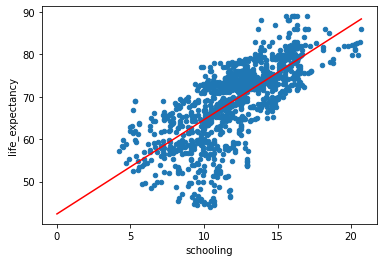

In [65]:
ax = data.plot.scatter(x="schooling",y="life_expectancy")

# points for the line
x = np.array([0, df["schooling"].max()])
ax.plot(x, beta_0_schooling + beta_1_schooling*x, color='red')

We are now ready to predict the life expectancy in using the testing dataset and evaluate our model's performance.

### Model Evaluation:

<h4> Evaluation metrics </h4>
We select the following 4 metrics to evaluate model's perforance:

- Mean Absolute Error (MAE): This is the average of the absolute differences between the predicted and actual values. It is less sensitive to outliers than the MSE.

- Mean Squared Error (MSE): This is the average of the squared differences between the predicted and actual values. Lower values indicate better performance.

- Root Mean Squared Error (RMSE): This is the square root of the MSE. It has the same units as the dependent variable and provides a more interpretable measure of the error.



- R-squared (R²): This measures the proportion of variance in the dependent variable that is explained by the independent variables. It ranges from 0 to 1, with higher values indicating better performance.

### Result Helper function:
To better collect and summarize all the results from testset, we create a helper function to calculate all metrics and add them into a dictionary.

In [66]:
result =  {'model_name': [], 'mean_absolute_error': [], 'mean_squared_error': [], 'root_mean_squared_error' : [], \
          'r2_score': []}

def getResult(model, model_name, X):
    
    y_pred = model.predict(X)
    mae = sklearn.metrics.mean_absolute_error(y_test,y_pred)
    mse = sklearn.metrics.mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test, y_pred))
    r2 = sklearn.metrics.r2_score(y_test, y_pred)
    
    result['model_name'].append(model_name)
    result['mean_absolute_error'].append(mae)
    result['mean_squared_error'].append(mse)
    result['root_mean_squared_error'].append(rmse)
    result['r2_score'].append(r2)
    
    print(f"for {model_name} model, the metrics on test set are: ")
    print("Mean Absolute Error: ", mae)
    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)
    print("r^2 Score: ", r2)

In [67]:
getResult(linear_mod_schooling, "linear-model-schooling", X_test[['schooling']])

for linear-model-schooling model, the metrics on test set are: 
Mean Absolute Error:  4.4965309580445085
Mean Squared Error:  34.550274311222715
Root Mean Squared Error:  5.877948137847315
r^2 Score:  0.5768762013048594


In [68]:
result

{'model_name': ['linear-model-schooling'],
 'mean_absolute_error': [4.4965309580445085],
 'mean_squared_error': [34.550274311222715],
 'root_mean_squared_error': [5.877948137847315],
 'r2_score': [0.5768762013048594]}

The mean_absolute_error and the root_mean_squared_error show around 4.5 yrs and 5.9 yrs respectively, which in terms of the life expectancy may be a little high but is still acceptable given the schooling being the only single predictor variable. <br>
<br>
The mean_squared_error is around 34.6 years is quite large which shows that perhaps other predicting variables should also be included in our regression model. <br>
<br>
The r2 score could also be improved as 0.58 may not be considered as a high enough score.

## Linear Regression on income_composition_of_resources


Here will repeat the exact steps as we have done with the Schooling feature but now with the Income feature.

Text(0.5, 1.0, 'Relationship between income_composition_of_resources and life expectancy')

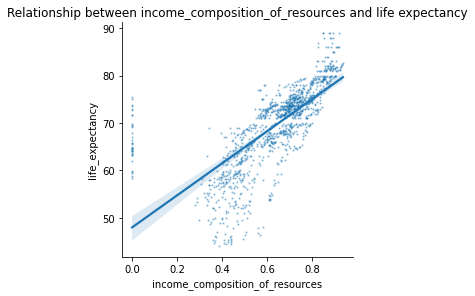

In [69]:
sns.lmplot(
    data=data, x="income_composition_of_resources", y="life_expectancy", height=4, 
    scatter_kws=dict(s=1.5, alpha=0.35)
);
ax = plt.gca()
ax.set_title("Relationship between income_composition_of_resources and life expectancy")

After visual inspection, it is also seems clear that the predictor variable income_composition_of_resources is also indeed with strong linear relation with Life Expectancy.

### Model Building

In [70]:
linear_mod_income = linear_model.LinearRegression()
linear_mod_income.fit(X_train[['income_composition_of_resources']], y_train)
beta_0_income = linear_mod_income.intercept_
beta_1_income = linear_mod_income.coef_[0]
print(f"Fit model: life_expectancy = {beta_0_income:.4f} + {beta_1_income:.4f} income_composition_of_resources")

Fit model: life_expectancy = 47.9761 + 33.8680 income_composition_of_resources


C:\Users\jackv\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



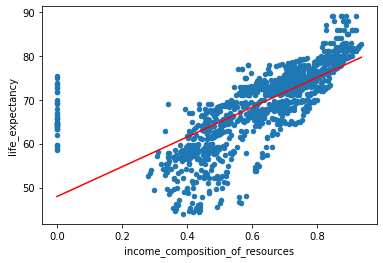

In [71]:
ax = data.plot.scatter(x="income_composition_of_resources",y="life_expectancy")

# points for the line
x = np.array([0, df["income_composition_of_resources"].max()])
ax.plot(x, beta_0_income + beta_1_income*x, color='red')

We are now ready to predict the life expectancy using the testing dataset and evaluate our model's performance.

### Model Evaluation

In [72]:
getResult(linear_mod_income, "linear-model-income", X_test[['income_composition_of_resources']])

for linear-model-income model, the metrics on test set are: 
Mean Absolute Error:  4.298114668305761
Mean Squared Error:  37.130149554969876
Root Mean Squared Error:  6.093451366423619
r^2 Score:  0.5452814705811363


In [73]:
result

{'model_name': ['linear-model-schooling', 'linear-model-income'],
 'mean_absolute_error': [4.4965309580445085, 4.298114668305761],
 'mean_squared_error': [34.550274311222715, 37.130149554969876],
 'root_mean_squared_error': [5.877948137847315, 6.093451366423619],
 'r2_score': [0.5768762013048594, 0.5452814705811363]}

The mean_absolute_error and the root_mean_squared_error show around 4.5 yrs and 5.9 yrs respectively, which is really similar to that of schooling feature. This makes sense since the correlation values for these 2 features are almost identical, with schooling being 0.72 and income being 0.71. Therefore, similar to our findings to the schooling feature, the errors may be a little high but are still acceptable given the income being the only single predictor variable. <br>
<br>
The mean_squared_error is around 34.6 years is quite large which shows that perhaps other predicting variables should also be included in our regression model. <br>
<br>
The r2 score could also be improved as 0.58 may not be considered as a high enough score.

## Multi-linear regression on both Schooling and income

We will now incorporate the schooling feature and income feature and perform a multi-linear regression to see if we can construct a more robust model. <br>

We will visualize the correlations for the 2 features first as we have done before.

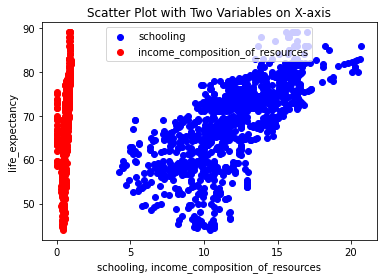

<Figure size 1080x720 with 0 Axes>

In [74]:
x1 = X_train["schooling"]
x2 = X_train["income_composition_of_resources"]

fig, ax = plt.subplots()

ax.scatter(x1, y_train, color='blue', label='schooling')
ax.scatter(x2, y_train, color='red', label='income_composition_of_resources')

# add a legend
ax.legend()

# set the axis labels and title
ax.set_xlabel('schooling, income_composition_of_resources')
ax.set_ylabel('life_expectancy')
ax.set_title('Scatter Plot with Two Variables on X-axis')

# show the plot
plt.figure(figsize=(15,10))
plt.show()

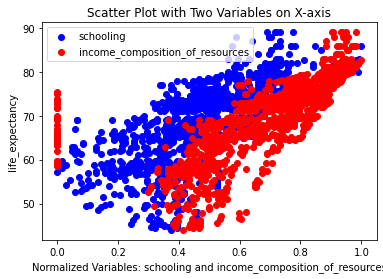

In [75]:
x1_norm = (x1 - np.min(x1)) / (np.max(x1) - np.min(x1))
x2_norm = (x2 - np.min(x2)) / (np.max(x2) - np.min(x2))

# create a scatter plot with x1_norm and x2_norm on the x-axis
fig, ax = plt.subplots()
ax.scatter(x1_norm, y_train, color='blue', label='schooling')
ax.scatter(x2_norm, y_train, color='red', label='income_composition_of_resources')

# add a legend
ax.legend()

# set the axis labels and title
ax.set_xlabel('Normalized Variables: schooling and income_composition_of_resources')
ax.set_ylabel('life_expectancy')
ax.set_title('Scatter Plot with Two Variables on X-axis')

# show the plot
plt.show()

### Model Building

In [76]:
X = np.column_stack((x1, x2))

norm_scaler = MinMaxScaler()
X_scaled = norm_scaler.fit_transform(X)

# create a linear regression model and fit it to the scaled data
two_linear_model = LinearRegression()
two_linear_model.fit(X_scaled, y_train) 

# print the coefficients of the model
print(two_linear_model.coef_)

[20.6961148  17.73046845]


In [77]:
norm_scaler = MinMaxScaler()
X_test_scaled = norm_scaler.fit_transform(X_test[["schooling", "income_composition_of_resources"]])

In [78]:
getResult(two_linear_model, "multi linear model with schooling and income", X_test_scaled)

for multi linear model with schooling and income model, the metrics on test set are: 
Mean Absolute Error:  3.9930656347474085
Mean Squared Error:  30.994684366867443
Root Mean Squared Error:  5.567286984417764
r^2 Score:  0.6204201312402917


The mean_absolute_error and the root_mean_squared_error show around 4.0 yrs and 5.6 yrs respectively, which clearly shows an improvement comparing to the single predictor regressions we've done before. This also makes sense since now we have 2 highly correlated predictors included, we should be able to make more a more precise prediction on the life expectancy. The errors themselves are still slightly high given the context of our life expectancy but it is acceptable. <br>
<br>
The mean_squared_error is around 31 years has also improved which is a good sign that our model is becoming more accurate. <br>
<br>
The r2 score has also improved to 0.62 which is getting higher but still has some room for improvement.

## Multi-Linear regression on columns corr >0.4

We will now perform regressions on features that have correlation values with life expectancy above 0.4.
These features will be schooling, income_composition_of_resources, bmi, gdp, percentage_expenditure, and alcohol. <br>

As we have seen examples of visualizations with the previous regressions, we will skip the visualization steps.<br>

We will also normalize the training dataset so that the different units across our features will not become an issue.

In [79]:
selected_columns = ['schooling','income_composition_of_resources','bmi','gdp','percentage_expenditure','alcohol']

In [80]:
norm_scaler = MinMaxScaler()
X_scaled_multi = norm_scaler.fit_transform(X_train[selected_columns])

# create a linear regression model and fit it to the scaled data
multi_linear_model = LinearRegression()
multi_linear_model.fit(X_scaled_multi, y_train) 

# print the coefficients of the model
print(multi_linear_model.coef_)

[18.57728826 16.74545526  5.39378814  2.77658584  8.59387621 -4.95649076]


After we have obtained the coefficient associated with each feature, we can use the following formula to demonstrate how we can obtain our predicted values for the life expectancy.

In [81]:
beta_0 = linear_mod_income.intercept_
coefs = multi_linear_model.coef_
beta_1_schooling = coefs[0]
beta_2_income_composition_of_resources = coefs[1]
beta_3_bmi = coefs[2]
beta_4_gdp = coefs[3]
beta_5_percentage_expenditure = coefs[4]
beta_6_alcohol = coefs[5]

print(f'''
Fit model: life_expectancy = 
{beta_0:.4f} + {beta_1_schooling:.4f} X schooling + {beta_2_income_composition_of_resources:.4f} X income_composition_of_resources + {beta_3_bmi:.4f} X bmi + {beta_4_gdp:.4f} X gdp + {beta_5_percentage_expenditure:.4f} X percentage_expenditure + {beta_6_alcohol:.4f} X alcohol
''')


Fit model: life_expectancy = 
47.9761 + 18.5773 X schooling + 16.7455 X income_composition_of_resources + 5.3938 X bmi + 2.7766 X gdp + 8.5939 X percentage_expenditure + -4.9565 X alcohol



### Model Evaluation


In [82]:
norm_scaler = MinMaxScaler()
X_test_multi_scaled = norm_scaler.fit_transform(X_test[selected_columns])

In [83]:
getResult(multi_linear_model, "multi linear model with corr > 0.4", X_test_multi_scaled)

for multi linear model with corr > 0.4 model, the metrics on test set are: 
Mean Absolute Error:  3.8863727478101273
Mean Squared Error:  27.919083093940824
Root Mean Squared Error:  5.283851161221408
r^2 Score:  0.6580858262258047


The mean_absolute_error and the root_mean_squared_error show around 3.9 yrs and 5.3 yrs respectively, which further shows an improvement comparing to the multi-predictor regression for just income and schooling. This makes sense since now we have more highly correlated predictors included, the prediction on the life expectancy should become more and more precise. The errors themselves are now acceptable in our opinion but could still be further improved and it shouldn't be hard if we have more and more correlated features included in our regression model. <br>
<br>
The mean_squared_error is around 28 years which is a big improvement and shows that our model is becoming more accurate. <br>
<br>
The r2 score has also improved to 0.65 which is getting higher and also another sign of our increased accuracy.

<h2>Conclusion:

We will now compile our evaluation results into the following table and compare across each models.

In [84]:
result_df = pd.DataFrame(result)
result_df

,model_name,mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
0,linear-model-schooling,4.496531,34.550274,5.877948,0.576876
1,linear-model-income,4.298115,37.130150,6.093451,0.545281
2,multi linear model with schooling and income,3.993066,30.994684,5.567287,0.620420
3,multi linear model with corr > 0.4,3.886373,27.919083,5.283851,0.658086


As we can see from above, the more highly correlated predictor variables being added to the regression model, the better the evaluation metrics show. One thing to note is that using a multi-linear regression with just income and schooling gives a big increase of accuracy compared to single-linear regression with just schooling and income. But when other features are added in, the increase of accuracy does not seem to have increased as much. <br>
<br>
As a result, although the more highly correlated features we add into the model may increase the accuracy, it will unlikely improve much. This result makes sense as the we have already included the highly correlated features and the subsequent features we add will not as correlated as the already added ones.

## extra


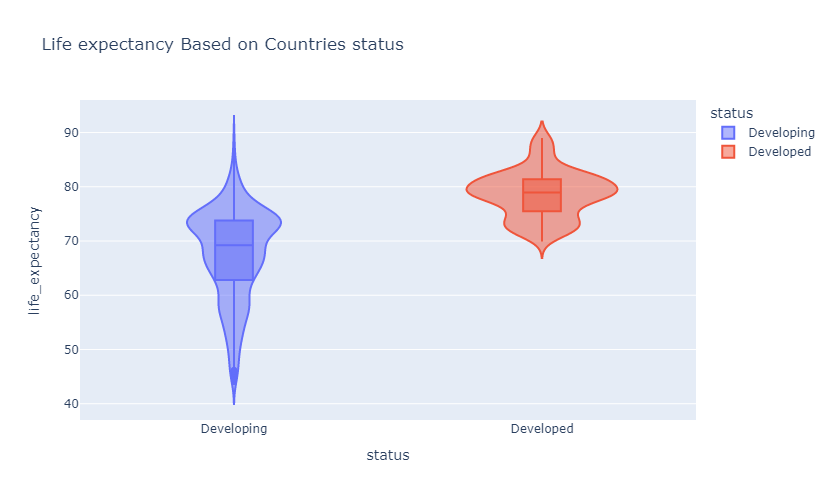

In [85]:
fig=px.violin(df,x='status',y='life_expectancy',color='status',\
              # template='presentation',\
              box=True,\
              title='Life expectancy Based on Countries status',\
             width=800, height=500 )
fig.show()